# **Proyek Kedua : System Recommender**


### **Nama : Nurul Nyi Qoniah**
### **Email : nurulqoniah313@gmail.com**
### **Username : nurqoneah**



## **Deskripsi**
Membuat model system recommender dengan menggunakan dataset book, user, rating dari [dataset kaggle](https://www.kaggle.com/code/fahadmehfoooz/book-recommendation-system/notebook)

## **Project Overview**

Di era kemajuan informasi, mencari buku yang tepat untuk dibaca bisa menjadi hal yang sangat berharga. Sistem Rekomendasi Buku digunakan untuk membantu pengguna atau pembaca dengan memberikan rekomendasi personal berdasarkan preferensi pengguna, riwayat membaca, dan faktor lain yang relevan. Proyek ini bertujuan untuk mengembangkan sistem rekomendasi buku yang tangguh dengan memanfaatkan teknik-teknik machine learning.

referensi dari proyek ini : [Journal](https://colab.research.google.com/drive/1m5rPhoWhpEEKA4bKkZEE-GbJU71zr9Q2#scrollTo=8Itu1xEASkEl&line=5&uniqifier=1)

## **Business Understanding**

### **Problem Statements**
Bagaimana cara merekomendasikan buku yang disukai pembaca lain dapat direkomendasikan kepada pembaca lainnya juga?

### **Goals**
Dapat membuat sistem rekomendasi yang akurat berdasarkan ratings dan aktivitas pengguna pada masa lalu.

### **Solution approach**
Solusi yang saya buat yaitu dengan menggunakan 2 algoritma Machine Learning sistem rekomendasi,yaitu :

* Content Based Filtering adalah algoritma yang merekomendasikan item merekomendasikan item yang mirip dengan item yang disukai pengguna di masa lalu.
* Collaborative Filtering adalah algoritma yang bergantung pada pendapat komunitas pengguna.






## **Data Understanding**
Dataset yang digunakan untuk membuat sistem rekomendasi buku ini didapat dari situs Kaggle **Book Recommendation Dataset** yang dapat diakses melalui link [dataset](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset)

In [1]:
import pandas as pd

books = pd.read_csv('/content/Books.csv')
users = pd.read_csv('/content/Users.csv')
ratings = pd.read_csv('/content/Ratings.csv')

print('Jumlah data books : ', len(books.ISBN.unique()))
print('Jumlah data users : ', len(users["User-ID"].unique()))
print('Jumlah data ratings : ', len(ratings.ISBN.unique()))

<ipython-input-1-8cbbb54380f9>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/Books.csv')


Jumlah data books :  271360
Jumlah data users :  278858
Jumlah data ratings :  340556


### **Univariate Exploratory Data Analysis**

Feature-feature dalam data **books** sebagai berikut:

*   ISBN : merupakan kode ISBN buku
*   Book_Title : merupakan judul buku
*   Book_Author : merupakan penulis buku
*   Year_Of_Publication : merupakan tahun buku saat dipublikasi
*   Image_URL_S : link gambar buku ukuran kecil
*   Image_URL_M : link gambar buku ukuran medium
*   Image_URL_L : link gambar buku ukuran besar

Feature-feature dalam data **user** sebagai berikut:

*   User-ID : merupkan Id User atau pembaca buku
*   Location : merupakan alamat pembaca buku atau user
*   Age : merupakan umur dari user atau pembaca buku

Feature-feature dalam data **ratings** sebagai berikut:

*   User-ID : merupkan Id User atau pembaca buku
*   ISBN : merupakan kode ISBN buku
*   Book-Rating : merupakan rating user untuk buku

In [2]:
books=books.rename(columns={'Book-Title': 'Book_Title', 'Book-Author': 'Book_Author', "Year-Of-Publication":"Year_Of_Publication", "Image-URL-S":"Image_URL_S", "Image-URL-M":"Image_URL_M","Image-URL-L":"Image_URL_L"})

In [3]:
users=users.rename(columns={'User-ID': 'User_ID'})

In [4]:
ratings=ratings.rename(columns={'User-ID': 'User_ID',"Book-Rating":"Book_Rating"})

In [5]:
books.info()
books.head()
books.describe()
print("\nData null:\n", books.isna().sum())
print("\nJumlah duplikasi: ", books.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book_Title           271360 non-null  object
 2   Book_Author          271358 non-null  object
 3   Year_Of_Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image_URL_S          271360 non-null  object
 6   Image_URL_M          271360 non-null  object
 7   Image_URL_L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB

Data null:
 ISBN                   0
Book_Title             0
Book_Author            2
Year_Of_Publication    0
Publisher              2
Image_URL_S            0
Image_URL_M            0
Image_URL_L            3
dtype: int64

Jumlah duplikasi:  0


In [6]:
users.info()
users.head()
users.describe()
print("\nData null:\n", users.isna().sum())
print("\nJumlah duplikasi: ", users.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User_ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB

Data null:
 User_ID          0
Location         0
Age         110762
dtype: int64

Jumlah duplikasi:  0


In [7]:
ratings.info()
ratings.head()
ratings.describe()
print("\nData null:\n", ratings.isna().sum())
print("\nJumlah duplikasi: ", ratings.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User_ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book_Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB

Data null:
 User_ID        0
ISBN           0
Book_Rating    0
dtype: int64

Jumlah duplikasi:  0



## **Data Preprocessing**
Menggabungkan **rating** dan **user**

In [8]:
rating_user = pd.merge(ratings,users, on="User_ID", how="left")
rating_user.head(10)

,User_ID,ISBN,Book_Rating,Location,Age
0,276725,034545104X,0,"tyler, texas, usa",NaN
1,276726,0155061224,5,"seattle, washington, usa",NaN
2,276727,0446520802,0,"h, new south wales, australia",16.0
3,276729,052165615X,3,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,"rijeka, n/a, croatia",16.0
5,276733,2080674722,0,"paris, n/a, france",37.0
6,276736,3257224281,8,"salzburg, salzburg, austria",NaN
7,276737,0600570967,6,"sydney, new south wales, australia",14.0
8,276744,038550120X,7,"torrance, california, usa",NaN
9,276745,342310538,10,"berlin, berlin, germany",27.0


In [9]:
rating_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   User_ID      1149780 non-null  int64  
 1   ISBN         1149780 non-null  object 
 2   Book_Rating  1149780 non-null  int64  
 3   Location     1149780 non-null  object 
 4   Age          840288 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 43.9+ MB


Menggabungkan **rating_user** dengan **books**

In [10]:
all_data=pd.merge(rating_user, books, on="ISBN", how="right" )

In [11]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032345 entries, 0 to 1032344
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User_ID              1031136 non-null  float64
 1   ISBN                 1032345 non-null  object 
 2   Book_Rating          1031136 non-null  float64
 3   Location             1031136 non-null  object 
 4   Age                  753301 non-null   float64
 5   Book_Title           1032345 non-null  object 
 6   Book_Author          1032343 non-null  object 
 7   Year_Of_Publication  1032345 non-null  object 
 8   Publisher            1032343 non-null  object 
 9   Image_URL_S          1032345 non-null  object 
 10  Image_URL_M          1032345 non-null  object 
 11  Image_URL_L          1032341 non-null  object 
dtypes: float64(3), object(9)
memory usage: 94.5+ MB


In [12]:
all_data.head()

,User_ID,ISBN,Book_Rating,Location,Age,Book_Title,Book_Author,Year_Of_Publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,2.0,0195153448,0.0,"stockton, california, usa",18.0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8.0,0002005018,5.0,"timmins, ontario, canada",NaN,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,11400.0,0002005018,0.0,"ottawa, ontario, canada",49.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,11676.0,0002005018,8.0,"n/a, n/a, n/a",NaN,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,41385.0,0002005018,0.0,"sudbury, ontario, canada",NaN,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [13]:
all_data.isnull().sum()

User_ID                  1209
ISBN                        0
Book_Rating              1209
Location                 1209
Age                    279044
Book_Title                  0
Book_Author                 2
Year_Of_Publication         0
Publisher                   2
Image_URL_S                 0
Image_URL_M                 0
Image_URL_L                 4
dtype: int64

Menghapus data yang tidak dibutuhkan

In [14]:
all_data=all_data.drop(columns=["Image_URL_S", "Image_URL_M", "Image_URL_L","Age","Location"])

In [15]:
all_data = all_data.dropna()

In [16]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1031132 entries, 0 to 1032344
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User_ID              1031132 non-null  float64
 1   ISBN                 1031132 non-null  object 
 2   Book_Rating          1031132 non-null  float64
 3   Book_Title           1031132 non-null  object 
 4   Book_Author          1031132 non-null  object 
 5   Year_Of_Publication  1031132 non-null  object 
 6   Publisher            1031132 non-null  object 
dtypes: float64(2), object(5)
memory usage: 62.9+ MB


## **Data Preparation**
### **Mengatasi Misiing Value**
menggunkan isnull untuk melihat data yang null

In [17]:
all_data.isnull().sum()

User_ID                0
ISBN                   0
Book_Rating            0
Book_Title             0
Book_Author            0
Year_Of_Publication    0
Publisher              0
dtype: int64

In [18]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1031132 entries, 0 to 1032344
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User_ID              1031132 non-null  float64
 1   ISBN                 1031132 non-null  object 
 2   Book_Rating          1031132 non-null  float64
 3   Book_Title           1031132 non-null  object 
 4   Book_Author          1031132 non-null  object 
 5   Year_Of_Publication  1031132 non-null  object 
 6   Publisher            1031132 non-null  object 
dtypes: float64(2), object(5)
memory usage: 62.9+ MB


In [19]:
all_data.head()

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher
0,2.0,0195153448,0.0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8.0,0002005018,5.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,11400.0,0002005018,0.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,11676.0,0002005018,8.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,41385.0,0002005018,0.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [20]:
all_data.Book_Author.unique()

array(['Mark P. O. Morford', 'Richard Bruce Wright', "Carlo D'Este", ...,
       'David Biggs', 'Teri Sloat', 'Christopher  Biffle'], dtype=object)

In [21]:
all_data.head()

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher
0,2.0,0195153448,0.0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8.0,0002005018,5.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,11400.0,0002005018,0.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,11676.0,0002005018,8.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,41385.0,0002005018,0.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


### **Mensorting data menurut ISBN**

In [22]:
preparation = all_data
preparation.sort_values('ISBN')

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher
1014536,171118.0,0000913154,8.0,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster
968367,86123.0,0001010565,0.0,Mog's Christmas,Judith Kerr,1992,Collins
968368,209516.0,0001010565,0.0,Mog's Christmas,Judith Kerr,1992,Collins
542164,23902.0,0001046438,9.0,Liar,Stephen Fry,0,Harpercollins Uk
788157,196149.0,0001046713,0.0,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers
...,...,...,...,...,...,...,...
670647,264317.0,B000234N76,0.0,Falling Angels,Tracy Chevalier,2001,E P Dutton
937723,100906.0,B000234NC6,0.0,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002,Knopf
829013,100088.0,B00029DGGO,0.0,"Good Wife Strikes Back, The",Elizabeth Buchan,0,Viking Adult
916521,179791.0,B0002JV9PY,0.0,The Blockade Runners,Jules Verne,0,Digireads.com


### **Menghapus data duplikat**

In [23]:
preparation = preparation.drop_duplicates('ISBN')
preparation = preparation.drop_duplicates('Book_Title')
preparation

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher
0,2.0,0195153448,0.0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8.0,0002005018,5.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
15,8.0,0060973129,0.0,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
18,8.0,0374157065,0.0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
29,8.0,0393045218,0.0,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...,...,...
1032339,276313.0,0449906736,5.0,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books
1032341,276579.0,0525447644,4.0,From One to One Hundred,Teri Sloat,1991,Dutton Books
1032342,276680.0,006008667X,0.0,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
1032343,276680.0,0192126040,0.0,Republic (World's Classics),Plato,1996,Oxford University Press


### **Membuat data list**

In [24]:

isbn = preparation['ISBN'].tolist()


book_title = preparation['Book_Title'].tolist()


author = preparation['Book_Author'].tolist()

print(len(isbn))
print(len(book_title))
print(len(author))




241068
241068
241068



## **Modeling and Result**
### **Content Filtered Recommendation System**
teknik content based filtering akan merekomendasikan item yang mirip dengan item yang disukai pengguna di masa lalu dengan tfidf vectorizer dan menghitung tingkat kesamaan dengan cosine similarity

In [25]:
recomendation_data_content=pd.DataFrame({
    'isbn': isbn,
    'book_title': book_title,
    'author': author
})
recomendation_data_content = recomendation_data_content[:20000]


### **TfidfVectorizer: mengubah data teks menjadi vektor**

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

tf.fit(recomendation_data_content['author'])

tf.get_feature_names_out()

array(['aa', 'aaron', 'aarsen', ..., 'â¼scher', 'â¼skind', 'â¼ter'],
      dtype=object)

In [27]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(recomendation_data_content['author'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(20000, 9149)

In [28]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
import pandas as pd

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=recomendation_data_content.book_title
).sample(22, axis=1).sample(10, axis=0)

,maxwell,cheryl,mayes,corbett,julianna,lora,tuttle,bobby,voltaire,shakspeare,...,das,trigiani,demirkan,tomkins,guevara,valerie,lynsay,carpenter,cory,breashears
book_title,,,,,,,,,,,,,,,,,,,,,
The Murderers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P.S. Longer Letter Later,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Song of Solomon (Oprah's Book Club (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I Think That It is Wonderful: Featuring Jim Henson's Sesame Street Muppets (Little Golden Book),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Prize,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Autobiography of Foudini M. Cat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cuentos de Eva Luna,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984 (Signet Classics (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Saving Grace,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [31]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=recomendation_data_content['book_title'], columns=recomendation_data_content['book_title'])

In [32]:
def book_recommendations(book_title, similarity_data=cosine_sim_df, items=recomendation_data_content[['book_title', 'author']], k=5):


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,book_title].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop book_title agar nama buku yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(book_title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [33]:
recomendation_data_content[recomendation_data_content.book_title.eq('The Diaries of Adam and Eve')]

,isbn,book_title,author
4545,0965881199,The Diaries of Adam and Eve,Mark Twain


In [34]:
recommendations = book_recommendations("The Diaries of Adam and Eve")

In [48]:
recommendations = recommendations.drop_duplicates()
recommendations

,book_title,author
0,A Connecticut Yankee in King Arthur's Court (B...,Mark Twain
1,"A Murder, a Mystery and a Marriage: A Story",Mark Twain
2,The Adventures of Tom Sawyer (Penguin Popular ...,Mark Twain
3,The Adventures of Huckleberry Finn (Bantam Cla...,MARK TWAIN
4,ADVENTURES OF HUCKLEBERRY FINN (ENRICHED CLASSIC),Mark Twain



### **Collaborative Filtered Recommendation System**
Dari data rating pengguna, maka akan diidentifikasi buku-buku yang mirip dan belum pernah dibaca oleh pengguna untuk direkomendasikan

In [36]:
preparation = preparation[preparation['Book_Rating'] != 0.0]
preparation

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher
1,8.0,0002005018,5.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
72,8.0,074322678X,5.0,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner
80,8.0,0887841740,5.0,The Middle Stories,Sheila Heti,2004,House of Anansi Press
82,8.0,1552041778,5.0,Jane Doe,R. J. Kaiser,1999,Mira Books
91,8.0,1567407781,6.0,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade
...,...,...,...,...,...,...,...
1032319,274220.0,3548740146,6.0,Wicca. Eine EinfÃ?Â¼hrung in weiÃ?Â?e Magie.,Scott Cunningham,2001,"Ullstein TB-Vlg., B."
1032320,274220.0,381440176X,8.0,"Ein Fall fÃ?Â¼r TKKG, Bd.50, Sklaven fÃ?Â¼r Wu...",Stefan Wolf,1989,Pelikan
1032337,275970.0,1845170423,7.0,Cocktail Classics,David Biggs,2004,Connaught
1032339,276313.0,0449906736,5.0,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books


In [37]:
recomendation_data_collaborative = preparation.drop(columns=["Book_Author", "Book_Title", "Year_Of_Publication","Publisher"])
recomendation_data_collaborative.sort_values('User_ID')

,User_ID,ISBN,Book_Rating
1,8.0,0002005018,5.0
72,8.0,074322678X,5.0
80,8.0,0887841740,5.0
82,8.0,1552041778,5.0
91,8.0,1567407781,6.0
...,...,...,...
644018,278851.0,0914511211,8.0
390357,278851.0,0440486599,5.0
744956,278854.0,0553275739,6.0
254461,278854.0,0316184152,7.0


### **Encoder data**

In [38]:


# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = recomendation_data_collaborative['User_ID'].unique().tolist()
print('list userID: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)


list userID:  [8.0, 12.0, 14.0, 19.0, 22.0, 276953.0, 277722.0, 32.0, 39.0, 42.0, 278390.0, 278418.0, 278188.0, 53.0, 56.0, 64.0, 67.0, 70.0, 73.0, 278851.0, 78.0, 81.0, 82.0, 83.0, 85.0, 86.0, 87.0, 88.0, 277698.0, 92.0, 97.0, 278202.0, 99.0, 276755.0, 277647.0, 102.0, 107.0, 109.0, 110.0, 114.0, 277439.0, 129.0, 133.0, 141.0, 162.0, 277315.0, 165.0, 176.0, 178.0, 183.0, 277783.0, 190.0, 202.0, 212.0, 215.0, 217.0, 226.0, 228.0, 230.0, 276796.0, 232.0, 242.0, 278218.0, 243.0, 277523.0, 278554.0, 277042.0, 277246.0, 277203.0, 278832.0, 244.0, 278681.0, 247.0, 254.0, 277427.0, 278085.0, 256.0, 277212.0, 257.0, 272.0, 273.0, 278.0, 289.0, 291.0, 300.0, 278257.0, 302.0, 310.0, 313.0, 323.0, 326.0, 334.0, 337.0, 339.0, 345.0, 361.0, 362.0, 276994.0, 376.0, 278800.0, 383.0, 387.0, 388.0, 277901.0, 392.0, 393.0, 408.0, 413.0, 277937.0, 424.0, 277641.0, 277195.0, 277873.0, 430.0, 431.0, 432.0, 433.0, 440.0, 278798.0, 441.0, 277197.0, 444.0, 446.0, 277378.0, 447.0, 453.0, 460.0, 463.0, 472.0, 

In [39]:


# Mengubah ISBN menjadi list tanpa nilai yang sama
isbn = recomendation_data_collaborative['ISBN'].unique().tolist()

# Melakukan proses encoding isbn
book_to_book_encoded = {x: i for i, x in enumerate(isbn)}

# Melakukan proses encoding angka ke isbn
book_encoded_to_book = {i: x for i, x in enumerate(isbn)}

# Selanjutnya, petakan userId dan isbn ke dataframe yang berkaitan.

# Mapping userId ke dataframe user
recomendation_data_collaborative['user'] = recomendation_data_collaborative['User_ID'].map(user_to_user_encoded)

# Mapping isbn ke dataframe books
recomendation_data_collaborative['isbn'] = recomendation_data_collaborative['ISBN'].map(book_to_book_encoded)

In [40]:
import numpy as np

num_users = len(user_to_user_encoded)
print(num_users)

num_book = len(book_encoded_to_book)
print(num_book)

recomendation_data_collaborative['ratings'] = recomendation_data_collaborative['Book_Rating'].values.astype(np.float32)

min_rating = min(recomendation_data_collaborative['Book_Rating'])

max_rating = max(recomendation_data_collaborative['Book_Rating'])

print('Number of User: {}, Number of book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

22798
94587
Number of User: 22798, Number of book: 94587, Min Rating: 1.0, Max Rating: 10.0


In [41]:
recomendation_data_collaborative = recomendation_data_collaborative.sample(frac=1, random_state=42)
recomendation_data_collaborative

,User_ID,ISBN,Book_Rating,user,isbn,ratings
727246,93047.0,1931686335,7.0,4695,32226,7.0
205644,5887.0,8484034445,8.0,1208,3136,8.0
888696,119654.0,0130474800,5.0,13158,59366,5.0
174404,4260.0,2253171395,6.0,948,2468,6.0
790746,61155.0,2266113917,7.0,10673,41260,7.0
...,...,...,...,...,...,...
318548,12990.0,0385319215,6.0,2353,6265,6.0
864767,69697.0,0373806957,8.0,6410,54886,8.0
962928,83671.0,0809016060,7.0,4709,76820,7.0
81066,1331.0,0786248688,9.0,343,860,9.0


### **Membagi data atau Split Data Train dan Test**

In [42]:
# Membuat variabel x untuk mencocokkan data user  dan book menjadi satu value
x = recomendation_data_collaborative[['user', 'isbn']].values.astype('float32')

# Membuat variabel y untuk membuat ratings dari hasil
y = recomendation_data_collaborative['ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values.astype('float32')

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * recomendation_data_collaborative.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)


In [43]:

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) # layer embedding book bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_book = tf.tensordot(user_vector, book_vector, 2)

    x = dot_user_book + user_bias + book_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [44]:
model = RecommenderNet(num_users, num_book, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)



# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
1183/1183 [==============================] - 40s 33ms/step - loss: 0.6755 - root_mean_squared_error: 0.2974 - val_loss: 0.6598 - val_root_mean_squared_error: 0.2841
Epoch 2/100
1183/1183 [==============================] - 41s 35ms/step - loss: 0.5753 - root_mean_squared_error: 0.2021 - val_loss: 0.6581 - val_root_mean_squared_error: 0.2819
Epoch 3/100
1183/1183 [==============================] - 43s 36ms/step - loss: 0.5711 - root_mean_squared_error: 0.1970 - val_loss: 0.6556 - val_root_mean_squared_error: 0.2788
Epoch 4/100
1183/1183 [==============================] - 42s 35ms/step - loss: 0.5717 - root_mean_squared_error: 0.1968 - val_loss: 0.6520 - val_root_mean_squared_error: 0.2749
Epoch 5/100
1183/1183 [==============================] - 41s 35ms/step - loss: 0.5767 - root_mean_squared_error: 0.2009 - val_loss: 0.6483 - val_root_mean_squared_error: 0.2709
Epoch 6/100
1183/1183 [==============================] - 42s 35ms/step - loss: 0.5786 - root_mean_squared_error: 0.

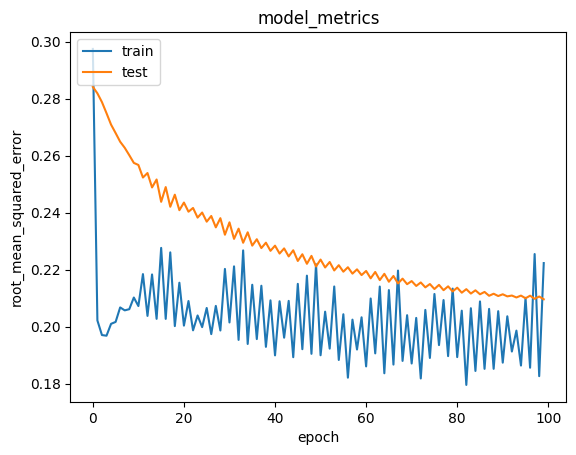

In [45]:
from pathlib import Path
import matplotlib.pyplot as plt

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
book_df = preparation
df = pd.read_csv('/content/Ratings.csv')
df = df.rename(columns={'User-ID': 'User_ID', "Book-Rating":"Book_Rating"})


user_id = df.User_ID.sample(1).iloc[0]
book_read_by_user = df[df.User_ID == user_id]


book_not_read = book_df[~book_df['ISBN'].isin(book_read_by_user.ISBN.values)]['ISBN']
book_not_read = list(
    set(book_not_read)
    .intersection(set(book_to_book_encoded.keys()))
)

book_not_read = [[book_to_book_encoded.get(x)] for x in book_not_read]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_read), book_not_read)
)


In [47]:
ratings = model.predict(user_book_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(book_not_read[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('books with high ratings from user')
print('----' * 8)

top_book_user = (
    book_read_by_user.sort_values(
        by = 'Book_Rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)

book_df_rows = book_df[book_df['ISBN'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.Book_Title, ':', row.Book_Author)

print('----' * 8)
print('Top 10 book recommendation')
print('----' * 8)

recommended_book = book_df[book_df['ISBN'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(row.Book_Title, ':', row.User_ID)

2956/2956 [==============================] - 3s 861us/step
Showing recommendations for users: 69310
books with high ratings from user
--------------------------------
Caddie Woodlawn : Carol Brink
A Christmas Carol (Tor Classics) : Charles Dickens
--------------------------------
Top 10 book recommendation
--------------------------------
To America : Personal Reflections of an Historian : 11676.0
The Everything You Want to Know About Sport Encyclopedia (Sports Illustrated for Kids) : 30889.0
Rumpole a LA Carte : 36148.0
Ruhe in Fetzen. Ein Fall fÃ?Â¼r Mrs. Murphy. : 41227.0
Freddy Goes to the North Pole (Freddy Books (Paperback)) : 44091.0
Hollywood Cats : 197801.0
Women: A Celebration : 70415.0
Tiennot : 79933.0
Running Out of Road : 212957.0
Songs of Experience : 242409.0
